<a href="https://colab.research.google.com/github/NicoMyshkin/streamingPlatformAnalysis/blob/main/streamingPlatformAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recomendation System for Streaming Platforms

In this Python tutorial, we'll explore movide data of popular streaming platforms and build a recommendation system

This tutorial was originally published by Avinash Navlani on August 30th, 2020 on Datacamp, you can see [here](https://www.datacamp.com/community/tutorials/streaming-platform-analysis).

We'll analyze movie data of streaming platforms such as Netflix, Prime Video, Hulu, and Disney+, and try to understand their viewers. Here are the highlights of the tutorial:

1.   Understanding the dataset
2.   Working with missing values
3.   Distribution plots
4.   Distribution of movies on each streaming platform
5.   Movie distribution according to genre
6.   Movie distribution according to country
7.   IMDB distribution according to language
8.   IMDB distribution according to platform
9.   Runtime per platform along with age group
10.  Building a recommendation system
11.  Conclusion



## 1. Understanding the dataset

The data consists of movies available on streaming platforms sucha s Netflix, Amazon Prime Video, Hulu, and Disney+. It can be downloaded from Kaggle [here](https://https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney).

It is composed of:

* ID: It is a unique ID for each record.
* Title: It is the name of the movie
* Year: Release year of the movie.
* Age: it is the target age group
* IMDb: IMDB rating of movies.
* Rotten Tomatoes: Rotten Tomatoes %
* Netflix: whether the movie is found on Netflix
* Hulu: whether the movie is found on Hulu
* Prime Video: whether the movie is found on Prime Video
* Disney+: whether the movie is found on Disney+
* Type: Movie or TV show
* Directors: Name of the director
* Genres: Type of genre
* Country: Country of origin
* Language: Language of origin
* Runtime: Duration of the movie

### 1.1 Importing libraries

In [130]:
# Magic function to plot outputs 
%matplotlib inline

# Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn import preprocessing
from scipy.sparse import hstack
import pandas_profiling

### 1.2 Loading dataset

In [131]:
# Load dataset

df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df = df.iloc[:,1:] # removing unnamed index column

In [132]:
df['IMDb'] = df['IMDb'].str[:3]
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str[:2]
df.IMDb = df.IMDb.astype('float')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype('float')


In [133]:
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,18+,7.8,98.0,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,7+,8.4,97.0,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,9.0,95.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,8.1,94.0,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,5,Roma,2018,18+,7.7,94.0,1,0,0,0,0,NaN,"Action,Drama,History,Romance,War","United Kingdom,United States",English,52.0


In [134]:
# Show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9515 non-null   int64  
 1   Title            9515 non-null   object 
 2   Year             9515 non-null   int64  
 3   Age              5338 non-null   object 
 4   IMDb             9309 non-null   float64
 5   Rotten Tomatoes  9508 non-null   float64
 6   Netflix          9515 non-null   int64  
 7   Hulu             9515 non-null   int64  
 8   Prime Video      9515 non-null   int64  
 9   Disney+          9515 non-null   int64  
 10  Type             9515 non-null   int64  
 11  Directors        9104 non-null   object 
 12  Genres           9399 non-null   object 
 13  Country          9261 non-null   object 
 14  Language         9202 non-null   object 
 15  Runtime          9196 non-null   float64
dtypes: float64(3), int64(7), object(6)
memory usage: 1.2+ MB


## 2. Working with missing values
In this section, we'll work with missing values using the `isnull()` function. Let's see an example below:

In [135]:
# Finding Missing values in all columns
missing = pd.DataFrame(df.isnull().sum())
missing = missing.rename(columns = {0:"miss_count"})
missing["miss_%"] = (missing.miss_count/len(df.ID))*100

missing

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,4177,43.899107
IMDb,206,2.165003
Rotten Tomatoes,7,0.073568
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


The variable "Age" has more than 50% missing values, whereas the others have less than 5%. To handle this, we'll drop the variable "Age" and drop NA from IMDb, Rotten Tomatoes, Directors, Genres, Country, Language and Runtime


In [136]:
# Dropping values with missing % more than 50%
df.drop(["Age"], axis = 1, inplace = True)
# Dropping NA's from the columns with less than 5% missing values
df.dropna(subset = ["IMDb","Rotten Tomatoes","Directors","Genres","Country","Language", "Runtime"], inplace = True)
df.reset_index(inplace = True, drop = True)
# Converting Year, IMDb and Rotten Tomatoes into object, float, and float type
df.Year = df.Year.astype("object")



In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8695 non-null   int64  
 1   Title            8695 non-null   object 
 2   Year             8695 non-null   object 
 3   IMDb             8695 non-null   float64
 4   Rotten Tomatoes  8695 non-null   float64
 5   Netflix          8695 non-null   int64  
 6   Hulu             8695 non-null   int64  
 7   Prime Video      8695 non-null   int64  
 8   Disney+          8695 non-null   int64  
 9   Type             8695 non-null   int64  
 10  Directors        8695 non-null   object 
 11  Genres           8695 non-null   object 
 12  Country          8695 non-null   object 
 13  Language         8695 non-null   object 
 14  Runtime          8695 non-null   float64
dtypes: float64(3), int64(6), object(6)
memory usage: 1019.1+ KB


## 3. Distribution plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


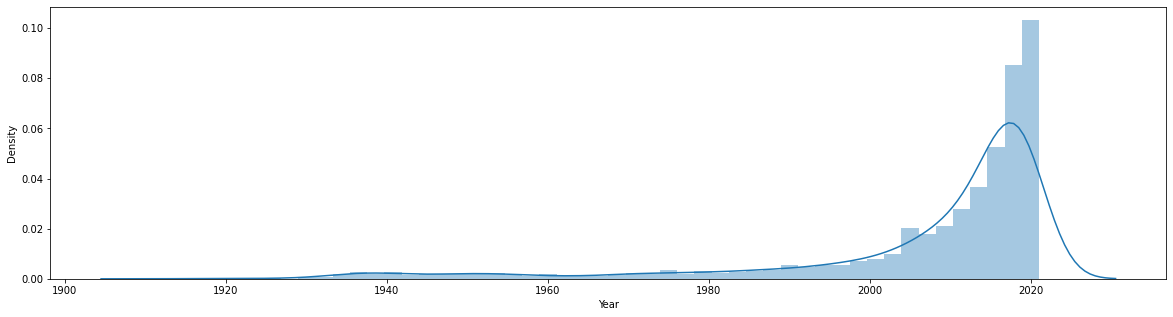

In [138]:
# Checking year distribution
plt.figure(figsize=(20,5))
sns.distplot(df["Year"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


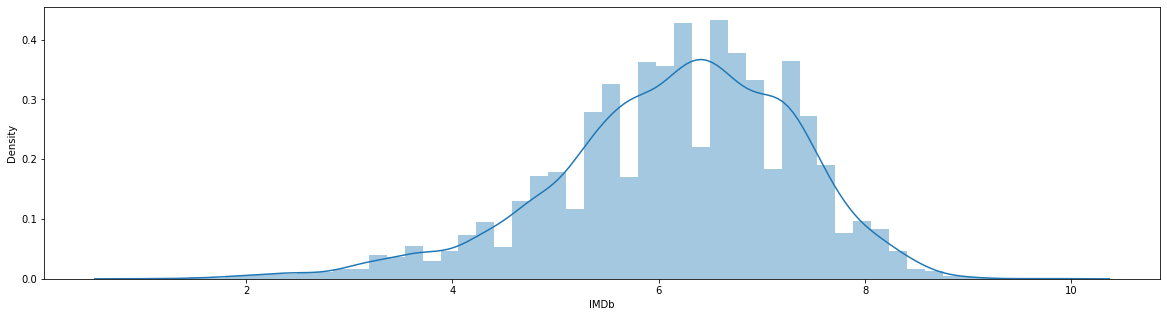

In [139]:
# Checking IMDb distribution
plt.figure(figsize=(20,5))
sns.distplot(df['IMDb'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


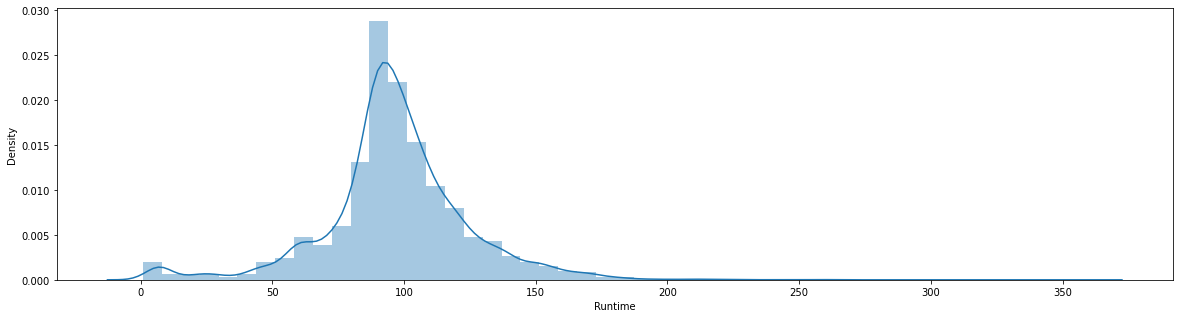

In [140]:
# Distribution of runtime
plt.figure(figsize=(20,5))
sns.distplot(df['Runtime'])

## 4. Distribution of movies on each streaming platform

In [141]:
# A function to calculate the movies in different Streaming platforms
def m_cnt(plat, count=False):
    if count==False:
        print('Platform {} Count: {}'. format(plat, df[plat].sum()))
    else:
        return df[plat].sum()

In [142]:
# Let's see count of movies/shows of each streaming platform
m_cnt('Netflix')
m_cnt('Hulu')
m_cnt('Prime Video')
m_cnt('Disney+')

Platform Netflix Count: 3325
Platform Hulu Count: 998
Platform Prime Video Count: 3799
Platform Disney+ Count: 819


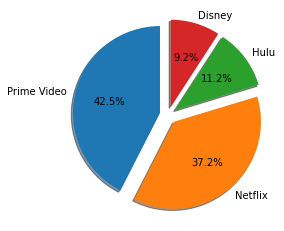

In [143]:
# Movies on each platform

lab = 'Prime Video', 'Netflix', 'Hulu', 'Disney'
s = [m_cnt('Prime Video', count = True),
     m_cnt('Netflix', count = True),
     m_cnt('Hulu', count = True),
     m_cnt('Disney+', count = True)]

explode = (0.1,0.1,0.1,0.1)

# Plotting
fig1, ax1 = plt.subplots()
ax1.pie(s, 
        labels = lab,
        autopct = "%1.1f%%",
        explode = explode,
        shadow = True,
        startangle = 90)

ax1.axis = ("equal")
plt.show()

From the plot above, we can infer that Prime Video hosts the majority of titles with a 42.5% share, whereas Netflix hosts 37.2%. Hulu and Disney host the minority of the titles with 11.2% and 9.2%, respectively.

## 5. Movie distribution according to genre

In this section we'll analyse genre-wise movie distribution. As the Genre attribute has more than one genre per movie, we'll first use `split()` function to split multiple values with a comma to create a list. Then we'll use `apply(pd.Series,1)` to create multiple columns for each genre and `stack()` function to stack them into a single column.

In [144]:
# Split the genres by "," & then stack it one after the other for easy analysis

g = df["Genres"].str.split(",").apply(pd.Series,1).stack()
g.index = g.index.droplevel(-1)

# Assign name to column

g.name = "Genres"

# delete column from df 
del df["Genres"]

# Join new column with the existing dataframe
df_genres = df.join(g)

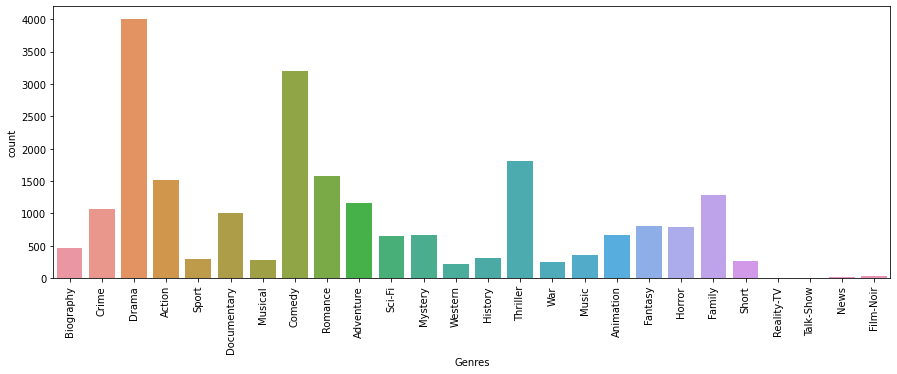

In [145]:
# Count of movies according to genre

plt.figure(figsize = (15,5))
sns.countplot(x = "Genres", data = df_genres)
plt.xticks(rotation = 90)
plt.show()

From the plot above, we see that most movies are Drama and Comedy.

## 6. Movie distribution according to country

 Similarly, we'll analyse country-wise movie distribution. Some movies have been recorded in different countries, and therefore, we'll separate these values, so that a film that has been recorded in 2 countries will appear twice, a row for each country

In [146]:
# Split the Country by ',' & then stack it one after the other for easy analysis.
c = df['Country'].str.split(',').apply(pd.Series, 1).stack()
c.index = c.index.droplevel(-1)
# Assign name to column
c.name = 'Country'
# delete column
del df['Country']
# join new column with the existing dataframe
df_country = df.join(c)

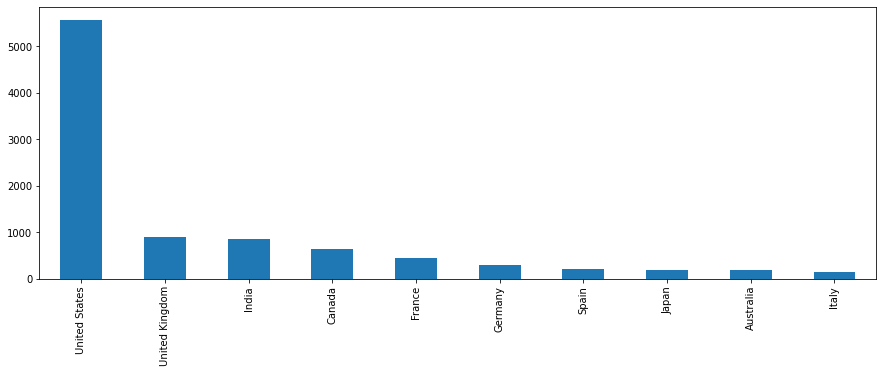

In [147]:
# plotting top 10 country and movie count
df_country['Country'].value_counts()[:10].plot(kind='bar',figsize=(15,5))
plt.show()

This graph above, shows that the majority of movies were made in the United States

## 7. Movie distribution according to language

In [148]:
# perform stacking operation on language column
l = df['Language'].str.split(',').apply(pd.Series,1).stack()
l.index = l.index.droplevel(-1)
# Assign name to column
l.name = 'Language'
# delete column
del df['Language']
# join new column with the existing dataframe
df_language = df.join(l)

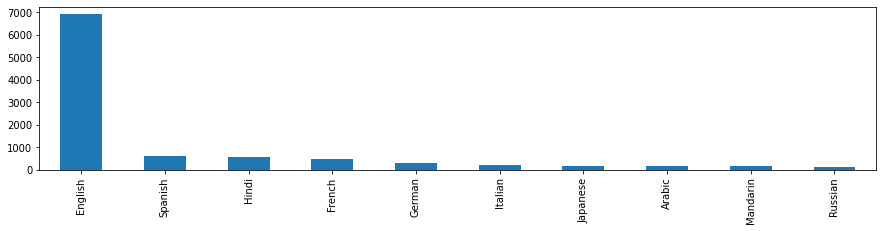

In [149]:
# plotting top 10 Language and movie count
df_language['Language'].value_counts()[:10].plot(kind='bar',figsize=(15,3))
plt.show()

We can also conclude that, the majority of movies were in the English language.

## 8. IMDb rating distribution according to platform

In this section we will plot platform-wise IMDb rating distribution. To do so, we'll need to apply the `melt()` function and plot FacetGrid plot. `melt()` fucntion converts a wide dataframe to a long dataframe.

In [150]:
# melting platform columns to create visualization

df2 = pd.melt(df, id_vars=['ID', 'Title', 'Year', 'IMDb', 'Runtime'], var_name = 'platform')
df2 = df2[df2.value==1]
df2.drop(columns=['value'], axis =1, inplace = True)

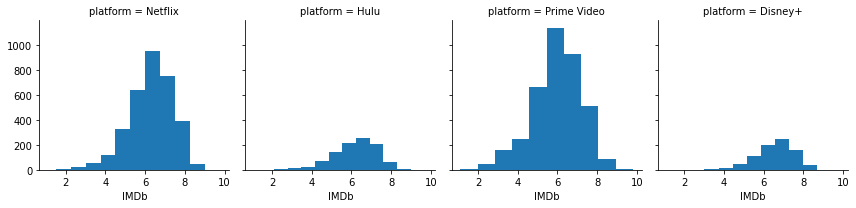

In [151]:
# Distribution of IMDB rating in different platform
g = sns.FacetGrid(df2, col = "platform")
g.map(plt.hist, "IMDb")
plt.show()

The plot above shows the average IMDb rating distribution on each platform. Both Netflix and Prime Video behave similarly in their content. same thing happens between Hulu and Disney+.

## 9. Runtime per platform along with age group

In the "Working With Missing Values Section", we have dropped the Age column. For getting results of Runtime Per Platform Along with Age Group. We need to load the data again and apply the melt() function.

In [152]:
# Load dataset
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df=df.iloc[:,1:]
df.ID = df.ID.astype("object")

# melting platform columns to create visualization
df2 = pd.melt(df, id_vars=["ID","Title","Year","Age","IMDb","Rotten Tomatoes","Type","Runtime"], var_name="platform")
df2 = df2[df2.value==1]
df2.drop(columns=["value"],axis=1,inplace=True)

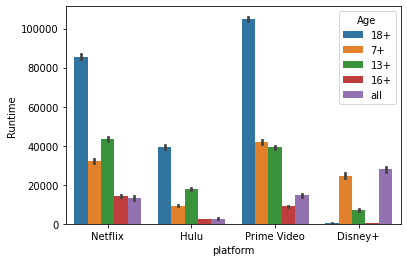

In [153]:
# Total of runtime in different platform
ax = sns.barplot(x="platform", y="Runtime",hue="Age", estimator=sum, data=df2)

From the plot above, we see that the total runtime on Prime Videos and Netflix by 18+ age group users is way higher than compared to the other platforms. We can interpret that both platforms have content focused on the 18+ age group.

## 10. Building a recommendation system

In the past few years, with the leap of YouTube, Walmart, Netflix, and many other such web-based services, recommender systems have created tremendous impact in the industry. From suggesting products/services to increasing companies value by online Ads-based monetization and matching the user's relevance and preference to make them buy. Recommender systems are irreplaceable in our daily web quests.

Generally, these are Math based frameworks focusing on suggesting products/services to end-users that are relevant to their needs and wants. For example, movies to watch, articles to read, products to buy, music to listen to, or anything depending on the domain. There are majorly three methods to build a Recommender Systems:

* **Content-Based Methods:** Define a model for users or items it interacted with 
based on items feature set recommend other similar items to the users.

* **Collaborative Filtering Methods:** Define a model for users and items interaction similarity score or User and User similarity score used for item recommendation.

* **Hybrid Methods:** Use both content and collaborative methods to achieve a better result.

In [154]:
# Reading Data Again
df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
df=df.iloc[:,1:]

In [155]:
#Finding Missing values in all columns
miss = pd.DataFrame(df.isnull().sum())
miss = miss.rename(columns={0:"miss_count"})
miss["miss_%"] = (miss.miss_count/len(df.ID))*100
miss

,miss_count,miss_%
ID,0,0.000000
Title,0,0.000000
Year,0,0.000000
Age,4177,43.899107
IMDb,206,2.165003
Rotten Tomatoes,7,0.073568
Netflix,0,0.000000
Hulu,0,0.000000
Prime Video,0,0.000000
Disney+,0,0.000000


In [156]:
#Dropping values with missing % more than 50%
df.drop(['Age'], axis = 1, inplace=True)
# Dropping Na's from the following columns
df.dropna(subset=['IMDb','Directors', 'Genres', 'Country', 'Language', 'Runtime'],inplace=True)
df.reset_index(inplace=True,drop=True)
# converting into object type
df.ID = df.ID.astype("object")
df.Year = df.Year.astype("object")
# transforming IMDb and Rotten Tomatoes data
df['IMDb'] = df['IMDb'].str[:3]
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str[:2]
df.IMDb = df.IMDb.astype('float')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype('float')

We build two recommender system based on cosine similarity


1.   Using only the numerical variable
2.   Using both numerical and categorical variable



### Using only numerical column

Select the numerical variable

In [157]:
ndf = df.select_dtypes(include=['float64',"int64"])

Scaling the numerical variable using min-max scaler to reduce model complexity and training time


In [158]:
#importing minmax scaler
from sklearn import preprocessing

# Create MinMaxScaler Object
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Create dataframe after transformation
ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))

# assign column names
ndfmx.columns=ndf.columns

# Show initial 5 records
ndfmx.head()

,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
0,0.770115,1.000000,1.0,0.0,0.0,0.0,0.0,0.581006
1,0.839080,0.986667,1.0,0.0,0.0,0.0,0.0,0.446927
2,0.908046,0.960000,1.0,0.0,0.0,0.0,0.0,0.229050
3,0.804598,0.946667,1.0,0.0,0.0,0.0,0.0,0.622905
4,0.689655,0.946667,1.0,0.0,0.0,0.0,0.0,0.273743


Compute similarity score using cosine similarity

In [159]:
# Import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
sig = cosine_similarity(ndfmx, ndfmx)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

In [160]:
indices.head()

Title
The Irishman                                0
Dangal                                      1
David Attenborough: A Life on Our Planet    2
Lagaan: Once Upon a Time in India           3
To All the Boys I've Loved Before           4
dtype: int64

Writing a function to get recommendations based on the similarity score

* The function takes two arguments, movie title, and similarity scores. It searches the index of the title corresponding to the original_titles index in our series of indices.
* Get the pairwise similarity scores of all the movies
* Sorting the similarity scores in descending order and converting them into a list
* Getting the top 10 movies scores and indices and returning the title of the top 10 movies from our dataframe.

In [161]:
def give_rec(title, sig=sig):

    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwise similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df['Title'].iloc[movie_indices]

In [171]:
# Execute get_rec() function for getting recommendation
give_rec("The Irishman",sig = sig)

3     Lagaan: Once Upon a Time in India
13                               Swades
43             Kabhi Khushi Kabhie Gham
1                                Dangal
64                        Kal Ho Naa Ho
69                    The Hateful Eight
45                         Super Deluxe
26                     Django Unchained
19                             The King
54                             3 Idiots
Name: Title, dtype: object

Here, recommended movies are not up to the mark. The reason behind this poor result is that we are using only movie ratings, movie runtimes, and platfom variables. We can improve this by using other information such as genre, directors, and country.

### Using numerical and textual column

Let's try a hybrid concept to improve our results

In [165]:
df.head()

,ID,Title,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,The Irishman,2019,7.8,98.0,1,0,0,0,0,Martin Scorsese,"Biography,Crime,Drama",United States,"English,Italian,Latin,Spanish,German",209.0
1,2,Dangal,2016,8.4,97.0,1,0,0,0,0,Nitesh Tiwari,"Action,Biography,Drama,Sport","India,United States,United Kingdom,Australia,K...","Hindi,English",161.0
2,3,David Attenborough: A Life on Our Planet,2020,9.0,95.0,1,0,0,0,0,"Alastair Fothergill,Jonathan Hughes,Keith Scholey","Documentary,Biography",United Kingdom,English,83.0
3,4,Lagaan: Once Upon a Time in India,2001,8.1,94.0,1,0,0,0,0,Ashutosh Gowariker,"Drama,Musical,Sport","India,United Kingdom","Hindi,English",224.0
4,6,To All the Boys I've Loved Before,2018,7.1,94.0,1,0,0,0,0,Susan Johnson,"Comedy,Drama,Romance",United States,English,99.0


We will use textual columns into a single column then use tokenizer and TF-IDF Vectorizer to create a sparse matrix of all the words TF-IDF score. Then we will select and scale the numerical variables and add them into the sparse matrix. We need to perform the following steps for preprocessing:

* Selecting all object data types and storing them in a list.
* Removing ID and Title column.
* Joining all text/object columns using commas into a single column.
* Creating a tokenizer to remove unwanted elements from our data like symbols and numbers.
* Converting TfidfVector from the text. After that we will do numerical columns pre-processing
* Selecting numerical variables into a data Frame
* Scaling Numerical variables using minmax scaler (0,1) range
* Adding numerical variables in the TF-IDF vectors sparse matrix using hstack function (hstack is used to add horizontal arrays into a sparse matrix).

In [166]:
#the function performs all the important preprocessing steps
def preprocess(df):
    #combining all text columns
    # Selecting all object data type and storing them in list
    s = list(df.select_dtypes(include=['object']).columns)
    # Removing ID and Title column
    s.remove("Title")
    s.remove("ID")
    # Joining all text/object columns using commas into a single column
    df['all_text']= df[s].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)

    # Creating a tokenizer to remove unwanted elements from our data like symbols and numbers
    token = RegexpTokenizer(r'[a-zA-Z]+')

    # Converting TfidfVector from the text
    cv = TfidfVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
    text_counts= cv.fit_transform(df['all_text'])

    # Aelecting numerical variables
    ndf = df.select_dtypes(include=['float64',"int64"])

    # Scaling Numerical variables
    scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

    # Applying scaler on our data and converting i into a data frame
    ndfmx = pd.DataFrame((scaler.fit_transform(ndf)))
    ndfmx.columns=ndf.columns    

    # Adding our adding numerical variables in the TF-IDF vector
    IMDb = ndfmx.IMDb.values[:, None]
    X_train_dtm = hstack((text_counts, IMDb))
    Netflix = ndfmx.Netflix.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Netflix))
    Hulu = ndfmx.Hulu.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Hulu))
    Prime = ndfmx["Prime Video"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Prime))
    Disney = ndfmx["Disney+"].values[:, None]
    X_train_dtm = hstack((X_train_dtm, Disney))
    Runtime = ndfmx.Runtime.values[:, None]
    X_train_dtm = hstack((X_train_dtm, Runtime))
    return X_train_dtm

Applying the function to our data and creating a sparse matrix

In [167]:
# Preprocessing data
mat =preprocess(df)
mat.shape

(8695, 8190)

Applying the cosine similarity to compute the similarity score

In [168]:
# using cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Compute the sigmoid kernel
sig2 = cosine_similarity(mat, mat)

# Reverse mapping of indices and movie titles
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()

Getting a recommendation from our improved system

In [170]:
give_rec("The Irishman", sig=sig2)

2896                                          Taxi Driver
34                                         Shutter Island
42                           No Direction Home: Bob Dylan
609     Rolling Thunder Revue: A Bob Dylan Story by Ma...
170                                                  Hugo
22                                           The Departed
337                                                  Mank
255                                         The Two Popes
70                                                   Rush
68                                          Casino Royale
Name: Title, dtype: object

## 11. Conclusion

In this tutorial, we performed an exploratory analysis of the streaming platform movie dataset. We have explored missing values, individual distribution plots, and distribution of movies on each streaming platform. We have also discovered insights on genre, country, language, IMDb ratings, and movie runtime. Finally, we have built a recommender system in Python.

For more tutorials like this, visit [datacamp.com](https://www.datacamp.com/community/tutorials/streaming-platform-analysis).
